# 随机矩阵引论：理论与实践

[**Introduction to Random Matrices: Theory and Practice**](https://arxiv.org/pdf/1712.07903.pdf) by Giacomo Livan, Marcel Novaes, Pierpaolo Vivo (2017)

该书给出了 **Matlab** 代码实现，下面是我的 **Python 2.7** 代码实现

## Chapter 0 辅助函数

+ 双阶乘函数

In [1]:
def double_factorial(n):
    x = 1
    if n % 2 == 0:
        for k in range(int(n / 2)):
            x = x * (2 * (k + 1))
    else:
        for k in range(int((n + 1) / 2)):
            x = x * (2 * (k + 1) - 1)
    return x

In [2]:
print double_factorial(5), double_factorial(6)

15 48


In [3]:
%notebook inline

## Chapter 1 Getting Started

+ This program plots a numerical histogram of the **eigenvalue density of Gaussian random matrix ensembles (Orthogonal, Unitary and Symplectic)**. You will be asked to select the ensemble by providing the value of the Dyson beta index (1 for GOE, 2 for GUE, 4 for GSE), to provide the matrix size N, and to choose the number of matrices to be diagonalized.

In [4]:
import numpy as np
from numpy import histogram, mat, diff
from numpy.linalg import eigvalsh
import matplotlib.pyplot as plt

2


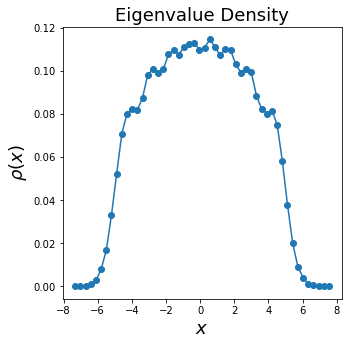

In [5]:
# Choose value of beta (1 for GOE, 2 for GUE, 4 for GSE): 
beta = input()
while beta != 1 and beta != 2 and beta != 4:
    print 'Error: beta has to be equal to 1, 2, or 4'
    beta = input()
    
# Choose matrix size: 
N = 8
# Choose number of matrices to be diagonalized: 
Nmatr = 50000

x = []
if beta == 1:
    # Gaussian Orthogonal Ensemble
    for nm in range(Nmatr):
        M = np.random.randn(N, N)
        M = (M + M.T) / 2
        x = np.append(x, eigvalsh(M))
elif beta == 2:
    # Gaussian Unitary Ensemble
    for nm in range(Nmatr):
        M = np.random.randn(N, N) + 1j * np.random.randn(N, N)
        M = mat(M)
        M = (M + M.H) / 2
        x = np.append(x, eigvalsh(M))
else:
    # Gaussian Symplectic Ensemble
    for nm in range(Nmatr):
        A = np.random.randn(N, N) + 1j * np.random.randn(N, N)
        B = np.random.randn(N, N) + 1j * np.random.randn(N, N)
        M1 = np.hstack((A, B))
        M2 = np.hstack((-np.conjugate(B), np.conjugate(A)))
        M = np.vstack((M1, M2))
        M = mat(M)
        M = (M + M.H) / 2
        x = np.append(x, np.unique(eigvalsh(M))) # The unique function gets rid of the double eigenvalues
        
plt.figure(figsize=(5, 5))
# Normalized eigenvalue histogram
n, bins = histogram(x, bins=50, normed=1)
bins_new = []
for i in range(len(bins) - 1):
    bins_new.append((bins[i] + bins[i + 1]) / 2)
plt.plot(bins_new, n, 'o-')
plt.title('Eigenvalue Density', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

## Chapter 2 Value the eigenvalue

+ This program plots a numerical histogram of the **eigenvalue spacing distribution for 2x2 GOE random matrices**, and compares it with the **Wigner surmise**. You will be asked to choose the number of matrices to be diagonalized.

> Why is it defined a ’surmise’? After all, it is the result of an exact calculation! The story goes as follows: at a conference on Neutron Physics by Time-of-Flight, held at the Oak Ridge National Laboratory in 1956, people asked a question about the possible shape of the distribution of the spacings of energy levels in a heavy nucleus. E. P. Wigner, who was in the audience, walked up to the blackboard and guessed (= surmised) the answer given above.

50000


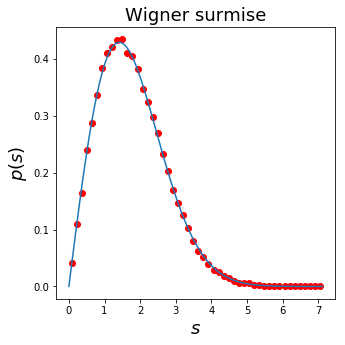

In [6]:
# Choose number of matrices to be diagonalized: 
Nmatr = input()

x = []

for nm in range(Nmatr):
    #M = np.random.randn(2, 2) / np.sqrt(2)
    m1 = np.random.randn()
    m2 = np.random.randn()
    m3 = np.random.randn() / np.sqrt(2)
    M = np.array([[m1, m3], [m3, m2]])
    x = np.append(x, abs(diff(eigvalsh(M))))   
    
plt.figure(figsize=(5, 5))
# Normalized spacing histogram
n, bins = histogram(x, bins=50, normed=1)
bins_new = []
for i in range(len(bins) - 1):
    bins_new.append((bins[i] + bins[i + 1]) / 2)
plt.plot(bins_new, n, 'or')

x_new = np.linspace(0, np.max(x), 100)
# Definition of the Wigner surmise function
p = lambda s: s * np.exp(- s ** 2 / 4) / 2
plt.plot(x_new, p(x_new))
plt.title('Wigner surmise', fontsize=18)
plt.xlabel(r'$s$', fontsize=18)
plt.ylabel(r'$p(s)$', fontsize=18)
plt.show()

## Chapter 3 Classified Material & Chapter 4 The fluid semicircle

+ This program generates the **equilibrium density of the Coulomb gas of particles (eigenvalues)** discussed in Chapters 3 and 4, and compares it to the **semicircle distribution**. Starting from an initial random particle configuration, a simple Monte Carlo scheme is applied: at each time step the program tries to change the position of a randomly selected particle by a Gaussian increment epsilon. The move is accepted with probability min(1, exp(-beta*DeltaH)), where DeltaH is the energy difference caused by the move. You will be asked to specify the number N of particles in the gas (which is equivalent to the matrix size in the corresponding ensemble), and the value of the Dyson Index beta, which in this context plays the role of the system's inverse temperature. You will also be asked to select the number of Monte Carlo sweeps, where one sweep corresponds to N attempted moves.  A good rule of thumb is to accept roughly 35-50% of the proposed Monte Carlo moves, and the standard deviation of the increments must be tuned accordingly. The program's default value is set at 10/sqrt(N).

In [7]:
import numpy as np
from numpy import histogram
import matplotlib.pyplot as plt

from __future__ import division

1
Sweep number:  0
Accepted moves: 0.546
Sweep number:  100
Accepted moves: 0.348
Sweep number:  200
Accepted moves: 0.350
Sweep number:  300
Accepted moves: 0.356
Sweep number:  400
Accepted moves: 0.348
Sweep number:  500
Accepted moves: 0.362
Sweep number:  600
Accepted moves: 0.366
Sweep number:  700
Accepted moves: 0.382
Sweep number:  800
Accepted moves: 0.364
Sweep number:  900
Accepted moves: 0.404


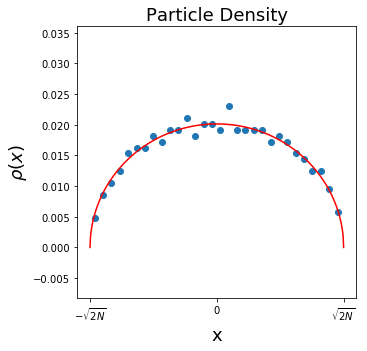

In [8]:
N = 500 # Number of particles (matrix size)
Nsweeps = 1000 # Number of sweeps. A sweep consists of N attempted Monte Carlo moves

beta = input() # Inverse temperature / Dyson index
while beta != 1 and beta != 2 and beta != 4:
    print 'Error: beta has to be equal to 1, 2, or 4'
    beta = input()

sigma = 10 / np.sqrt(N) # Standard deviation of the Gaussian distribution for Monte Carlo moves

# Initial uniform distribution of particles between -sqrt(2*N) and sqrt(2*N)
x = -np.sqrt(2 * N) + 2 * np.sqrt(2 * N) * np.random.rand(N)

for ns in range(Nsweeps):
    count = 0
    for n in range(N):
        k = np.random.randint(N) # Random selection of a particle
        epsilon = sigma * np.random.randn() # Size of the proposed position shift of particle k
        
        # The particles' positions (except for particle k) are stored in 
        # an auxiliary vector aux, which is used to compute the change in
        # energy (Hamiltonian) upon moving particle k from its current 
        # position x(k) to x(k)+epsilon
        
        aux = np.hstack((x[0:k], x[k+1:]))
        
        # Change in energy
        DeltaH = epsilon ** 2 + epsilon * x[k] + np.sum(np.log(abs(x[k] - aux) / abs(x[k] + epsilon - aux)))
        # The position change of particle k is accepted with probability min(1,exp(-beta*DeltaH))
        if min(1, np.exp(-beta * DeltaH)) > np.random.rand():
            x[k] = x[k] + epsilon
            count = count + 1
    
    # Printing to screen the number of completed sweeps, and the fraction of accepted moves in the latest sweep
    if ns % 100 == 0:
        print 'Sweep number: % d\nAccepted moves: %4.3f' % (ns, count / N)

# Plot of normalized particle density and Wigner's semicircle
plt.figure(figsize=(5, 5))

#n, bins, patches = plt.hist(x, bins=30, normed=1, facecolor='None', edgecolor='black',alpha=1, histtype='bar')
n, bins = histogram(x, bins=30, normed=1)
bins_new = []
for i in range(len(bins) - 1):
    bins_new.append((bins[i] + bins[i + 1]) / 2)
plt.scatter(bins_new, n)

# Definition of the semicircle distribution function
rho = lambda x: np.sqrt(2 * N - x ** 2) / (np.pi * N)
# Plot of the semicircle distribution (between -sqrt(2*N) and sqrt(2*N))
x_sc = np.linspace(-np.sqrt(2 * N), np.sqrt(2 * N), N)
plt.plot(x_sc, rho(x_sc), 'r')
plt.title('Particle Density', fontsize=18)
plt.xlabel('x', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.xticks([-np.sqrt(2 * N), 0, np.sqrt(2*N)], [r'$-\sqrt{2N}$','0',r'$\sqrt{2N}$'])
plt.show()

## Chapter 5 Saddle-point-of-view

+ This program computes the results of Eqs. (5.21) and (5.22) and prints their values to screen

+ The fact that the soft edges are symmetrically located around the origin is a consequence of the symmetry of the confining potential under the exchange $x \rightarrow -x$.

+ **Question:** If I drop the symmetry requirements on the entries of the ensemble ($H_{ij}\ne H_{ji}$), what is the resulting analogue of the semicircle law for complex eigenvalues?

> This is called the **Girko-Ginibre (or circular) law**. In essence, for any sequence of random N × N matrices whose entries are i.i.d. random variables, all with mean zero and variance equal to 1/N, the limiting spectral density is the **uniform distribution over the unit disc in the complex plane**.

In [9]:
import numpy as np
from numpy import histogram, mat, diff
from numpy.linalg import eigvalsh
from scipy.integrate import quad
import matplotlib.pyplot as plt

from __future__ import division

In [10]:
# Endpoints of semicircle density
a = -np.sqrt(2)
b = -a

# Definition of the semicircle distribution function
sc = lambda x: np.sqrt(2 - x ** 2) / np.pi

# Integrand functions of the two integrals in Eq. (5.21)
integrand1 = lambda x: sc(x) * x ** 2
integrand2 = lambda x: sc(x) * np.log(x - a)

# Computing Eq. (5.21)
f_int = quad(integrand1, a, b)[0] / 4 + a ** 2 / 4 - quad(integrand2, a, b)[0] / 2

# Computing Eq. (5.22)
f = (-9 * a ** 4 + 4 * a ** 3 * b + 2 * a ** 2 * (5 * b ** 2 + 48) + 4 * a * b * (b ** 2 + 16) 
     - 256 * np.log(b - a) -9 * b ** 4 + 96 * b ** 2 + 512 * np.log(2)) / 512

print 'Result of Eq. 5.21: %5.4f' % f_int
print 'Result of Eq. 5.22: %5.4f' % f

Result of Eq. 5.21: 0.5483
Result of Eq. 5.22: 0.5483


+ This short code performs a numerical check of the **Tricomi equation** (5.14), where n*(x) is the semicircle density. The density is computed over a number Npts of points in the interval (-sqrt(2),sqrt(2)). The value in each point s is computed as a principal value integral, i.e. by splitting the integration domain (a,b) into two parts (a,s-eps) and (s+eps,b). You will be asked to enter the value of a parameter eps, which determines the accuracy with which the integral is computed, and the number of points where the integral is computed.

1000


/Users/brucelee/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/Users/brucelee/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


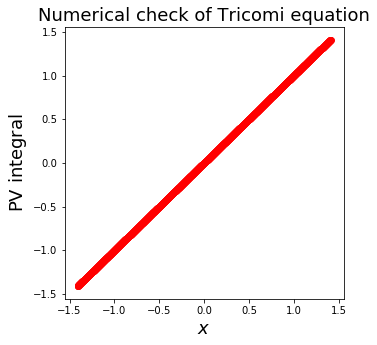

In [11]:
# Reads the number of points where the Tricomi equation integral is computed
Npts = input()

# Reads the value which determines the accuracy of the principal value 
# integral (values in the range 1e-1 - 1e-10 are recommended)
eps = 1e-5

# Endpoints of semicircle density
a = -np.sqrt(2)
b = -a

# Setting the interval over which the Tricomi equation integral is computed
s = np.linspace(a, b, Npts)
v = np.zeros(Npts)

# Integrand function of the Tricomi equation integral
sc = lambda x: np.sqrt(2 - x ** 2) / np.pi

for i in range(Npts):
    # Here the above integrand function is specialized to the particular
    # point s(i) where the integral is going to be computed
    integrand = lambda x: sc(x) / (s[i] - x)
    
    # Principal value integral
    v[i] = quad(integrand, a, s[i] - eps)[0] + quad(integrand, s[i] + eps, b)[0]
    
# Plotting the results of the principal value integrals and comparing them with the bisector line
plt.figure(figsize=(5, 5))
plt.plot(s, s, 'b')
plt.plot(s, v, 'or')
plt.title('Numerical check of Tricomi equation', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\mathrm{PV \ integral}$', fontsize=18)
plt.show()

+ This program plots a numerical histogram of the **rescaled densities for all three Gaussian Ensembles**, and compares them with the semicircle distribution. You will be asked to choose both the size and the number of matrices to be diagonalized (for each of the three ensembles).

/Users/brucelee/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


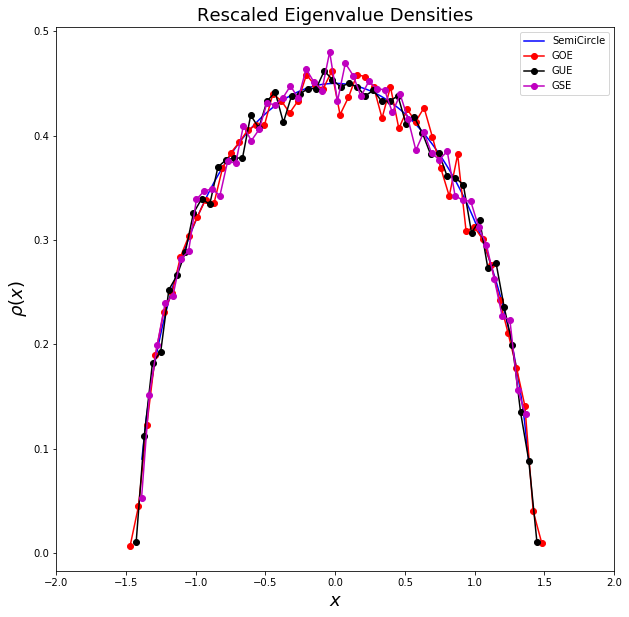

In [12]:
# Choose matrix size: 
# N = 10
N = 100
# N = 1000

# Choose number of matrices to be diagonalized: 
Nmatr = 100

# Definition of the semicircle distribution function
rho = lambda x: np.sqrt(2 - x ** 2) / np.pi

x1 = []; x2 = []; x4 = []

for nm in range(Nmatr):
    # GOE
    M = np.random.randn(N, N) / np.sqrt(N)
    M = (M + M.T) / 2
    x1 = np.append(x1, eigvalsh(M))
    
    # GUE
    M = (np.random.randn(N, N) + 1j * np.random.randn(N, N)) / np.sqrt(2 * N)
    M = mat(M)
    M = (M + M.H) / 2
    x2 = np.append(x2, eigvalsh(M))
    
    # GSE
    A = (np.random.randn(N, N) + 1j * np.random.randn(N, N)) / np.sqrt(4 * N)
    B = (np.random.randn(N, N) + 1j * np.random.randn(N, N)) / np.sqrt(4 * N)
    M1 = np.hstack((A, B))
    M2 = np.hstack((-np.conjugate(B), np.conjugate(A)))
    M = np.vstack((M1, M2))
    M = mat(M)
    M = (M + M.H) / 2
    x4 = np.append(x4, np.unique(eigvalsh(M)))
    
plt.figure(figsize=(10, 10))

# Plot of the semicircle distribution
x = np.linspace(-np.sqrt(2), np.sqrt(2), 100)
semicircle, = plt.plot(x, rho(x), 'b')

# Normalized eigenvalue histogram
n1, bins1 = histogram(x1, bins=50, normed=1)
n2, bins2 = histogram(x2, bins=50, normed=1)
n4, bins4 = histogram(x4, bins=50, normed=1)
bins_new1 = []
for i in range(len(bins1) - 1):
    bins_new1.append((bins1[i] + bins1[i + 1]) / 2)

bins_new2 = []
for i in range(len(bins2) - 1):
    bins_new2.append((bins2[i] + bins2[i + 1]) / 2)
    
bins_new4 = []
for i in range(len(bins4) - 1):
    bins_new4.append((bins4[i] + bins4[i + 1]) / 2)

GOE, = plt.plot(bins_new1, n1, 'or-')
GUE, = plt.plot(bins_new2, n2, 'ok-')
GSE, = plt.plot(bins_new4, n4, 'om-')

plt.title('Rescaled Eigenvalue Densities', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.xlim((-2, 2))
#plt.xticks([-np.sqrt(2), 0, np.sqrt(2)], [r'$-\sqrt{2}$','0',r'$\sqrt{2}$'])
plt.legend(handles=[semicircle, GOE, GUE, GSE], labels=['SemiCircle', 'GOE', 'GUE', 'GSE'], loc='upper right')
plt.show()

## Chapter 8 Resolve(nt) the semicircle

+ This program provides a quick numerical verification that the two **resolvent** branches in eq. (8.20) match eq. (8.5) for different signs. Namely, you will be asked to choose the real and imaginary parts of a complex number z (with real part such that -sqrt(2) < Real(z) < sqrt(2)). For small values of the imaginary parts you will be able to verify that G_plus matches the resolvent for -sqrt(2) < Real(z) < 0, whereas G_minus matches it for 0 < Real(z) < sqrt(2).

In [13]:
import numpy as np
from scipy.integrate import quad

In [14]:
re = input()

while abs(re) >= np.sqrt(2):
    print 'ERROR: Real(z) must be smaller than sqrt(2) in absolute value'
    re = input()

im = input()
z = re - 1j * im

# The value of the resolvent is computed in z
G = quad(lambda x: np.sqrt(2 - x ** 2) / (np.pi * (z - x)), -np.sqrt(2), np.sqrt(2))[0]

G_plus = lambda x: x + np.sqrt(x ** 2 - 2)
G_minus = lambda x: x - np.sqrt(x ** 2 - 2)

print 'Value of resolvent in z: %6.4f%+6.4fi' % (G.real, G.imag)
print 'Value of G plus in z: %6.4f%+6.4fi' % (G_plus(z).real, G_plus(z).imag)
print 'Value of G minus in z: %6.4f%+6.4fi' % (G_minus(z).real, G_minus(z).imag)

0.5
2
Value of resolvent in z: 0.0890+0.0000i
Value of G plus in z: 0.9110-4.4329i
Value of G minus in z: 0.0890+0.4329i


/Users/brucelee/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


## Chapter 10 Finite N

+ What does in the bulk mean? The point is that Hermite polynomials (and other classical orthogonal polynomials) have two different asymptotics, according to the way their argument and parameter scale with N. This in turns corresponds to different regimes, namely different locations x where the spectrum is looked at, and different zooming resolutions.

## Chapter 11 Meet Andréief

+ This program performs an indirect numerical check of the **Andréief identity** by verifying that the equations reported in Chapter 11 (see, e.g., eq. (11.9)) correctly provide the **probability of a GUE matrix having a certain number of positive eigenvalues**. You will be asked to provide the matrix size N and the number n of positive eigenvalues. First, you will be shown the analytical prediction computed by the program for the aforementioned probability. Based on that, you will be able to choose the number of matrices to diagonalize numerically in order to obtain a numerical estimate for the same probability.

### 数值实验

In [15]:
import numpy as np
from numpy import *
from numpy.linalg import eigvalsh
import matplotlib.pyplot as plt

from __future__ import division

In [16]:
N = 5 # size of a GUE matrix
n = 2 # number of eigenvalues of a GUE matrix is positive
Nmatr = 1000 # samples of GUE matrices

count = 0
for nm in range(Nmatr):
    M = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    M = mat(M)
    M = (M + M.H) / 2
    eigvals_pos = filter(lambda e: e > 0, eigvalsh(M))
    if len(eigvals_pos) == n:
        count = count + 1
    
p = count / Nmatr
print 'Numerically estimated probability of GUE matrix of size %d having %d positive eigenvalues: %.2f%%' % (N, n, p * 100.0)

Numerically estimated probability of GUE matrix of size 5 having 2 positive eigenvalues: 45.80%


### 符号计算

+ 这里，使用sympy库进行高维矩阵的符号计算非常慢，利用**符号计算(symbolic computation)**方法应该可以大幅改进算法效率

In [17]:
from sympy import Matrix, Symbol, zeros, diff, det, factorial, simplify, exp, sin

In [18]:
N = 5 # size of a GUE matrix
n = 2 # number of eigenvalues of a GUE matrix is positive

z = Symbol('z', integer=True)
A = Matrix(N, N, lambda j, k: ((-1) ** (j + k) + z) * 2 ** (((j + k) - 3) / 2) * factorial(((j + k) - 1) / 2))
B = Matrix(N, N, lambda j, k: ((-1) ** (j + k) + 1) * 2 ** (((j + k) - 3) / 2) * factorial(((j + k) - 1) / 2))


phi = A.det() / B.det()
phi_der = diff(phi, z, n) / factorial(n)

p = phi_der.subs(z, 0)
print 'Theoretical probability of GUE matrix of size %d having %d positive eigenvalues: %.2f%%' % (N, n, p.evalf() * 100.0)

Theoretical probability of GUE matrix of size 5 having 2 positive eigenvalues: 49.04%


+ This code performs a symbolic check of the **Toda recurrence** of equations (11.11) and (11.12). You will be asked to type in a function a0(x) that will be used to fill the entries of the tau matrices through derivation, i.e. a1(x) = a0'(x), a2(x) = a1'(x) = a0''(x), and so on.

In [19]:
x = Symbol('x', integer=True)

# Reads the function a0 to be used in the example. In order for the code
# to produce a result quickly we recommend using a smooth and simple
# function, e.g. a0(x) = cos(x), a0(x) = exp(-x)
a0 = exp(x)

# Choose value of n: 
n = input()

# Allocating space for matrices that will be used to derive the functions
# tau_n and tau_{n+1}
tau_n = Matrix(n, n, lambda j, k: diff(a0, x, j + k))
tau_n_plus_1 = Matrix(n + 1, n + 1, lambda j, k: diff(a0, x, j + k))

# Computing values of tau functions as determinants of tau matrices
tau_n_minus_1 = det(tau_n[0:-1, 0:-1])
tau_n = simplify(det(tau_n))
tau_n_plus_1 = simplify(det(tau_n_plus_1))

# Computing difference between the two sides of equation (11.12)
res = simplify(diff(tau_n, x, 2) * tau_n - (diff(tau_n, x, 1)) ** 2 - tau_n_minus_1 * tau_n_plus_1)
print 'The difference between the two sides of equation (11.12) is: %3.2f' % res.evalf()

3
The difference between the two sides of equation (11.12) is: 0.00


## Chapter 12 Finite N is not finished

+ This program plots a histogram of the **eigenvalue density obtained from the numerical diagonalization of random matrices from the Gaussian ensembles**, and compares it with the theoretical densities (eq. (12.22)  for the GOE, (10.21) for the GUE, (12.38) for the GSE). You will be asked to select the ensemble by providing the value of the Dyson beta index (1 for GOE, 2 for GUE, 4 for GSE), to provide the matrix size N, and to choose the number of matrices to be diagonalized.

In [20]:
import numpy as np
from numpy import histogram, mat, diff, trapz, sign
from numpy.linalg import eigvalsh
from scipy.integrate import quad
from scipy.special import hermite, factorial
import matplotlib.pyplot as plt

from __future__ import division

2
8


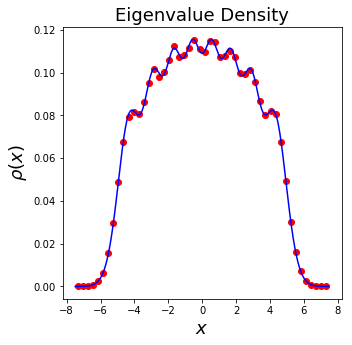

In [21]:
# Choose value of beta (1 for GOE, 2 for GUE, 4 for GSE): 
beta = input()

# Choose matrix size: 
N = input()
# N = 8

if beta == 1:
    while N % 2 != 0:
        print 'Error: N has to be even for beta = 1'
        N = input()

# Choose number of matrices to be diagonalized: 
Nmatr = 50000

E = []

# The following IF condition selects the desired ensemble: a number Nmatr
# of matrices are diagonalized, and the eigenvalues are collected in the 
# vector E

if beta == 1:
    # Gaussian Orthogonal Ensemble
    for nm in range(Nmatr):
        M = np.random.randn(N, N)
        M = (M + M.T) / 2
        E = np.append(E, eigvalsh(M))
    
    x = np.linspace(np.min(E), np.max(E), 1000)
    
    # Computing the GOE density for finite even N (eq. 11.21)
    rho = np.zeros(len(x))
    a_N = 1
    for k in range(int(N / 2)):
        R_2k = np.array(map(hermite(2 * k), x)) * np.sqrt(2) / (np.pi ** (1 / 4) * 2 ** k * double_factorial(2 * k))
        
        if k == 0:
            R_2k1 = (-np.array(map(hermite(2 * k + 1), x))) * np.sqrt(2) / (np.pi ** (1 / 4) * 2 ** (k + 2) * double_factorial(2 * k - 1))
        else:
            R_2k1 = (4 * k * np.array(map(hermite(2 * k - 1), x)) - np.array(map(hermite(2 * k + 1), x))) * np.sqrt(2) / (np.pi ** (1 / 4) * 2 ** (k + 2) * double_factorial(2 * k - 1))
        
        Phi_2k = np.zeros(len(x)); Phi_2k1 = np.zeros(len(x))
        
        for i in range(len(x)):
            Phi_2k[i] = trapz(np.multiply(np.multiply(R_2k, np.exp(-np.power(x, 2) / 2)), sign(x[i] - x)), x)
            Phi_2k1[i] = trapz(np.multiply(np.multiply(R_2k1, np.exp(-np.power(x, 2) / 2)), sign(x[i]-x)), x)
        
        rho = np.add(rho, np.multiply(np.exp(-np.power(x, 2) / 2), (np.multiply(R_2k, Phi_2k1) - np.multiply(R_2k1, Phi_2k))))
        a_N = a_N * factorial(2 * k)
        
    a_N = (-1) ** (N / 2) * 2 ** (N * (N - 2) / 4) / (np.pi ** (N / 4) * a_N)
    Z = factorial(N) * a_N * 2 ** (N/2)
    rho = factorial(N - 1) * 2 ** (N / 2 - 1) * a_N * rho
    rho = rho / Z
    
elif beta == 2:
    # Gaussian Unitary Ensemble
    for nm in range(Nmatr):
        M = np.random.randn(N, N) + 1j * np.random.randn(N, N)
        M = mat(M)
        M = (M + M.H) / 2
        E = np.append(E, eigvalsh(M))
    
    x = np.linspace(np.min(E), np.max(E), 1000)
    
    # Computing the GUE density for finite N (eq. 10.20)
    rho = np.zeros(len(x))
    
    for j in range(N):
        rho = np.add(rho, np.multiply(np.power(map(hermite(j), x / np.sqrt(2)), 2), np.exp(-np.power(x, 2) / 2)) / (2 ** j * factorial(j)))
    
    rho = rho / (N * np.sqrt(2 * np.pi))
    
else:
    # Gaussian Symplectic Ensemble 
    for nm in range(Nmatr):
        A = np.random.randn(N, N) + 1j * np.random.randn(N, N)
        B = np.random.randn(N, N) + 1j * np.random.randn(N, N)
        M1 = np.hstack((A, B))
        M2 = np.hstack((-np.conjugate(B), np.conjugate(A)))
        M = np.vstack((M1, M2))
        M = mat(M)
        M = (M + M.H) / 2
        E = np.append(E, np.unique(eigvalsh(M))) # The unique function gets rid of the double eigenvalues
     
    x = np.linspace(np.min(E), np.max(E), 1000)
    
    # Computing the GSE density for finite N (eq. 11.36)
    rho = np.zeros(len(x))
    
    for k in range(int(N)):
        if k == 0:
            Q_2k = np.ones(len(x)) * np.sqrt(2) / (np.pi ** (1/4))
            Q_2k_tilde = np.ones(len(x))
            Q_2k_der = np.zeros(len(x))
            Q_2k_tilde_der = np.zeros(len(x))
        else:
            Q_2k_tilde = np.add(4 * k * Q_2k_tilde_old, np.array(map(hermite(2 * k), x / np.sqrt(2))))
            Q_2k = Q_2k_tilde * np.sqrt(2) / (np.pi ** (1/4) * 2 ** k * double_factorial(2 * k))
            Q_2k_tilde_der = 4 * k * np.add(Q_2k_tilde_der_old, np.array(map(hermite(2 * k - 1), x / np.sqrt(2))) / np.sqrt(2))
            Q_2k_der = Q_2k_tilde_der * np.sqrt(2) / (np.pi ** (1/4) * 2 ** k * double_factorial(2 * k))
        
        Q_2k1 = np.array(map(hermite(2 * k + 1), x / np.sqrt(2))) * np.sqrt(2) / (np.pi ** (1/4) * 2 ** (k + 1) * double_factorial(2 * k + 1))
        Q_2k1_der = (2 * k + 1) * np.array(map(hermite(2 * k), x / np.sqrt(2))) /(np.pi ** (1/4) * 2 ** k * double_factorial(2 * k + 1))
        
        rho = np.add(rho, np.multiply(np.exp(-x ** 2 / 2), np.multiply(Q_2k, Q_2k1_der) - np.multiply(Q_2k1, Q_2k_der)) / (2 * N))
        Q_2k_tilde_old = Q_2k_tilde
        Q_2k_tilde_der_old = Q_2k_tilde_der

plt.figure(figsize=(5, 5))
# Normalized eigenvalue histogram
n, bins = histogram(E, bins=50, normed=1)
bins_new = []
for i in range(len(bins) - 1):
    bins_new.append((bins[i] + bins[i + 1]) / 2)
plt.plot(bins_new, n, 'or')
plt.plot(x, rho, 'b')
plt.title('Eigenvalue Density', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

## Chapter 13 Classical Ensembles: Wishart-Laguerre & Chapter 14 Meet Marčenko and Pastur

+ This program plots a histogram of the **eigenvalue densities obtained via numerical diagonalization of Wishart-Laguerre random matrices** (for beta = 1,2,4) and compares them with the **Marčenko-Pastur density** for the corresponding matrix size. You will be asked to provide the sizes of the rectangular NxM matrices H used to build Wishart-Laguerre matrices of the type W = X'*X, and the number of matrices to be diagonalized.

+ Historically, one of the **earliest appearances** of a random matrix ensemble1 occurred in **1928**, when the Scottish mathematician **John Wishart** published a paper on multivariate data analysis in the journal Biometrika.

+ In Mathematics, however, the **1897** work by **Hurwitz** on the volume form of a general unitary matrix is of historical significance.

+ The Wishart ensemble is also referred to as **“Laguerre”**, since its spectral properties involve Laguerre polynomials, and also **“chiral”** in the context of applications to **Quantum Chromodynamics (QCD)**.

In [22]:
import numpy as np
from numpy import mat
from numpy.linalg import eigvalsh
import matplotlib.pyplot as plt 

from __future__ import division

100
200


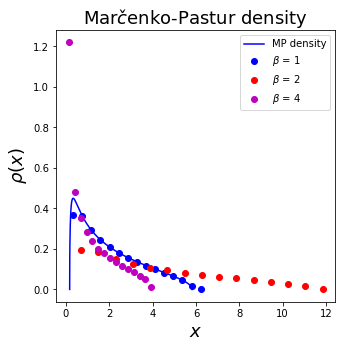

In [23]:
# Choose first matrix size: 
N = input()
#N = 100

# Choose second matrix size: 
M = input()
# M = 200
# M = 800

while N >= M:
    print 'ERROR: N must be less than M\n'
    N = input()
    M = input()

# Defining the Marcenko-Pastur density function
c = N / M
xmin = (1 - 1 / np.sqrt(c)) ** 2
xmax = (1 + 1 / np.sqrt(c)) ** 2
rho = lambda x: np.sqrt((x - xmin) * (xmax - x)) / (2 * np.pi * x)

# Choose number of matrices to be diagonalized: 
Nmatr = 5000

x1 = []; x2 = []; x4 = []

for nm in range(Nmatr):
    # beta = 1
    beta = 1
    H = np.random.randn(N, M)
    W = np.dot(H, H.T)
    x1 = np.append(x1, eigvalsh(W) / (beta * N)) # Notice the rescaling of the eigenvalues
    
    # beta = 2
    H = np.random.randn(N, M) + 1j * np.random.randn(N, M)
    H = mat(H)
    W = np.dot(H, H.H)
    x2 = np.append(x2, eigvalsh(W) / (beta * N)) # Notice the rescaling of the eigenvalues
    
    # beta = 4
    beta = 4
    A = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    B = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    H1 = np.hstack((A, B))
    H2 = np.hstack((-np.conjugate(B), np.conjugate(A)))
    H = np.vstack((H1, H2))
    H = mat(H)
    W = np.dot(H, H.H)
    x4 = np.append(x4, np.unique(eigvalsh(W)) / (beta * N)) # Notice the rescaling of the eigenvalues
    
    
plt.figure(figsize=(5, 5))

x = np.linspace(xmin, xmax, 1000)
MP, = plt.plot(x, rho(x), 'b')

# Plotting the histograms for the three numerical eigenvalue densities
n1, bins1 = histogram(x1, bins=15, normed=1)
n2, bins2 = histogram(x2, bins=15, normed=1)
n4, bins4 = histogram(x4, bins=15, normed=1)
bins_new1 = []
for i in range(len(bins1) - 1):
    bins_new1.append((bins1[i] + bins1[i + 1]) / 2)

bins_new2 = []
for i in range(len(bins2) - 1):
    bins_new2.append((bins2[i] + bins2[i + 1]) / 2)
    
bins_new4 = []
for i in range(len(bins4) - 1):
    bins_new4.append((bins4[i] + bins4[i + 1]) / 2)

beta1, = plt.plot(bins_new1, n1, 'ob')
beta2, = plt.plot(bins_new2, n2, 'or')
beta4, = plt.plot(bins_new4, n4, 'om')

plt.title(r'Mar$c\check$enko-Pastur density', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.legend(handles=[MP, beta1, beta2, beta4], labels=['MP density', r'$\beta$ = 1', r'$\beta$ = 2', r'$\beta$ = 4'], loc='upper right')
plt.show()

## Chapter 15 Replicas...

+ This program provides a numerical verification that equations (15.2) and (15.6) coincide in a 2x2 case. The program generates a random 2x2 GOE matrix H and uses it to compute the numerical value of Z(x) according to the two formulas. You will be asked to choose the real and imaginary parts of the number x (imaginary part has to be positive).

In [24]:
import numpy as np
from numpy.linalg import eigvalsh
from scipy.integrate import nquad

In [25]:
# Choose real part of argument x: 
#re = 0.2
re = input()

# Choose imaginary part of argument x: 
# im = 4.4
im = input()

while im <= 0:
    print 'ERROR: Imaginary part has to be positive'
    im = input()

x = re - 1j * im

# Generating 2x2 GOE matrix
H = np.random.randn(2, 2) / np.sqrt(2)
H = (H + H.T) / 2

# Eigenvalues of matrix H
E = eigvalsh(H)

# Definition of integrand function for Z
f = lambda y1, y2: np.exp(- 1j * ((x - H[0, 0]) * y1 ** 2 + 2 * H[0, 1] * y1 * y2 + (x - H[1, 1]) * y2 ** 2) / 2)

# Z function
Z = nquad(f, [[-np.Inf, np.Inf], [-np.Inf, np.Inf]])[0]

# Explicit form of Z function
Z_exp = 2 * np.pi * np.exp(-(np.log(E[0] - x) + np.log(E[1] - x)) / 2 + 1j * np.pi / 2)

print 'Value of Z function computed as integral: %6.4f%+6.4fi' % (Z.real, Z.imag)
print 'Value of Z function computed explicitly via eigenvalues of H: %6.4f%+6.4fi' % (Z_exp.real, Z_exp.imag)

0.2
4.4
Value of Z function computed as integral: 1.4198+0.0000i
Value of Z function computed explicitly via eigenvalues of H: 1.4198-0.0253i


/Users/brucelee/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:390: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


## Chapter 17 Born to be free

+ This program presents a numerical verification of the **free addition** example discussed in section 17.4, i.e. that of the addition of GOE and Wishart random matrices. You will be asked to select the size of the matrices (including the size of the rectangular matrices used to build Wishart matrices), the number of matrices to be numerically diagonalized, and the relative weight p between the two ensembles (with p=1 coinciding with the GOE and p=0 coinciding with the Wishart ensemble).

+ **Two random matrices are free if the traces of all non-commutative products of matrix polynomials, whose traces are zero, are zero.**

> 这里补充介绍Python中调用Matlab函数: 

+ sympy中的solve, solveset求解复杂的代数方程异常慢, 建议选择Matlab, Mathematica或Maple等专门软件来处理这类符号计算问题.


In [26]:
#matlab
#syms G z a w

#sol = solve('w^2*G/2 + (1-w)*(1+a)/(1-(1-w)*G) + 1/G - z', 'G');
#sol = subs(sol,[a,w],[alpha,p]);
#sol = vpa(sol);

+ 当然也可以在Python中调用Matlab函数, 详细说明见[MathWorks教程](https://www.mathworks.com/help/matlab/matlab-engine-for-python.html)

    + 首先进入Matlab应用中相应的python目录中: cd /Applications/MATLAB_R2014b.app/extern/engines/python
    + 在root权限下安装python支持: sudo python setup.py install

In [27]:
import matlab
import matlab.engine as engine

In [28]:
eng = engine.start_matlab()
future = eng.sqrt(2.0, async=True)
res = future.result()
print(res)
eng.quit()

1.41421356237


+ Hybrid computation of numerical and symbolical Python

In [29]:
import numpy as np
from numpy import histogram
from numpy.linalg import eigvalsh
import matplotlib.pyplot as plt

from sympy import symbols, solve

from __future__ import division

100
200
0.5


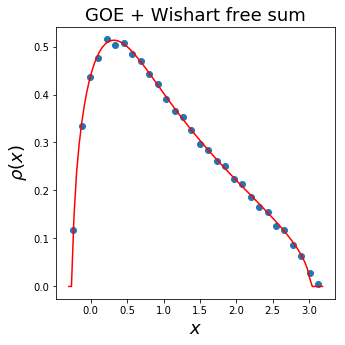

In [30]:
# Choose size of GOE and Wishart matrices: 
#N = 100
N = input()

# Choose second dimension of rectangular matrices used to build Wishart matrices: 
#T = 200
T = input()

while N >= T:
    print 'ERROR: T must be larger than N\n'
    N = input()
    T = input()
    
# Parameters associated with Wishart matrices to be used in later calculations
c = N / float(T)
alpha = (1 - c) / c

# Choose relative weight of GOE matrices: 
# p = 0.3
# p = 0.5
# p = 0.7
p = input()

# Choose number of matrices to be diagonalized: 
Nmatr = 200

E = []

for nm in range(Nmatr):
    # Generating GOE matrix
    M = np.random.randn(N, N)
    M = (M + M.T) / 2
    
    # Generating Wishart matrix
    H = np.random.randn(N, T)
    W = np.dot(H, H.T)
    
    # Sum of rescaled GOE and rescaled Wishart
    H = p * M / np.sqrt(N) + (1 - p) * W / N
    
    E = np.append(E, eigvalsh(H))
    
# In the following the analytical solution for the eigenvalue density is
# computed on a support ranging from the minimum to the maximum of the
# numerically obtained eigenvalues. The density is computed in a number
# Npts of points
Npts = 100
x = np.linspace(np.min(E), np.max(E), Npts)

# Defining symbolic variables: G denotes the resolvent, z denotes the
# complex variable the resolvent is a function of, whereas a and w are
# the symbolic variables that will be eventually replaced, respectively,
# by the numerical values of the parameter alpha = (1-c)/c and of the
# relative weight p.
G, z, a, w = symbols('G, z, a, w')

# Here the symbolic solution for the resolvent G is obtained, initially
# as a function of z, a, and w. Then, the numerical values of alpha and p
# are used to replace a and w. The sol variable is a 3-dimensional vector
# whose components represent solutions of the 3rd degree polynomial
# equation for G.
expr = w ** 2 * G / 2 + (1 - w) * (1 + a) / (1 - (1 - w) * G) + 1 / G - z
expr = expr.subs({a:alpha, w:p})
sol = solve(expr, G)
    
G = []

for i in range(Npts):
    # Replacing the symbolic variable z with the numerical value of the
    # point x(i) where the resolvent is being computed
    tmp = [complex(s.subs({z: x[i]})) for s in sol]
    
    # The following if condition selects solutions with a non-zero 
    # imaginary part (see Eq. 8.8)
    if tmp[0].imag == 0:
        G.append(abs(tmp[1].imag) / np.pi)
    else:
        G.append(abs(tmp[0].imag) / np.pi)
        
plt.figure(figsize=(5, 5))
# Normalized eigenvalue histogram
n, bins = histogram(E, bins=30, normed=1)
bins_new = []
for i in range(len(bins) - 1):
    bins_new.append((bins[i] + bins[i + 1]) / 2)
plt.plot(bins_new, n, 'o')

plt.plot(x, G, 'r')

plt.title('GOE + Wishart free sum', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()